# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [37]:
# use these links to do so:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Understanding the data

In [41]:
data = pd.read_csv("../Telecom/Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
colmn = data.columns
colmn

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


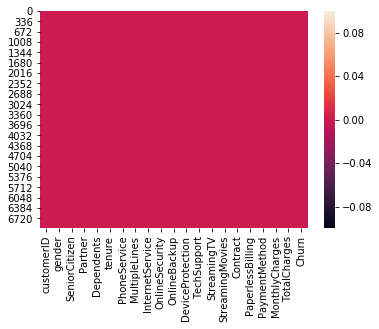

In [7]:
sns.heatmap(data.isnull())

### Data Manipulation

In [8]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data = data.fillna(data.mean())
data["TotalCharges"].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [9]:
col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in col : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

In [10]:
def tenure_group(x):
    if x in range(0,12):
        return "Tenure 1"
    if x in range(12,24):
        return "Tenure 2"
    if x in range(24,36):
        return "Tenure 3"
    if x in range(36,48):
        return "Tenure 4"
    if x in range(48,60):
        return "Tenure 5"
    if x in range(60,73):
        return "Tenure 6"
data["tenure-group"] = data["tenure"].apply(lambda a : tenure_group(a))

In [11]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({0:"No" , 1:"Yes"})

### Data Visualization

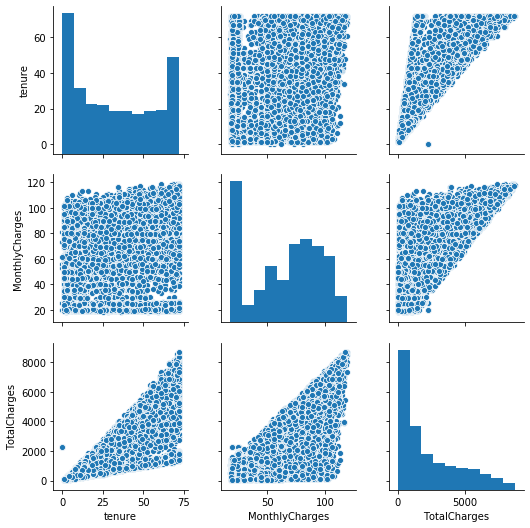

In [12]:
sns.pairplot(data = data)

/home/shreya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


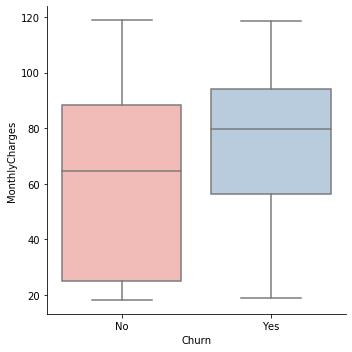

In [13]:
sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

/home/shreya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


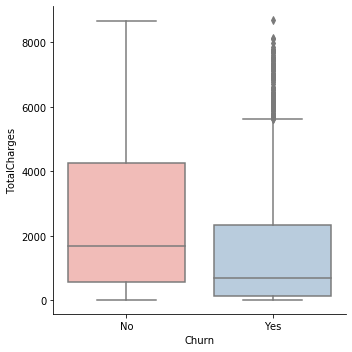

In [14]:
sns.factorplot(x="Churn", y = "TotalCharges",data = data, kind="box", palette = "Pastel1")

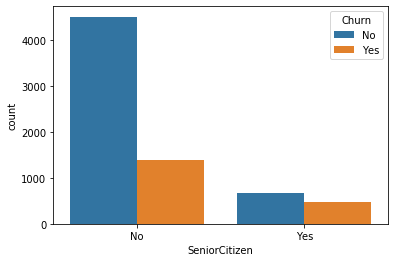

In [15]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)

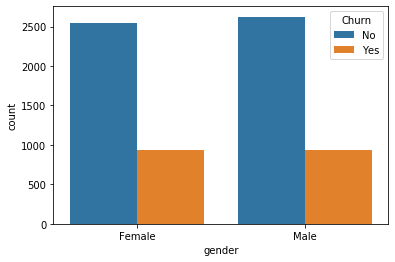

In [16]:
sns.countplot(x='gender', hue='Churn', data=data)

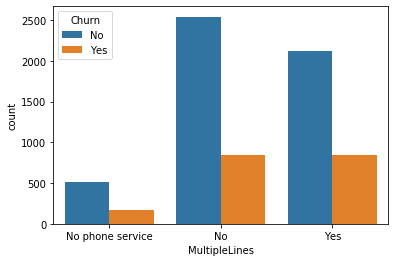

In [17]:
sns.countplot(x='MultipleLines', hue='Churn', data=data)

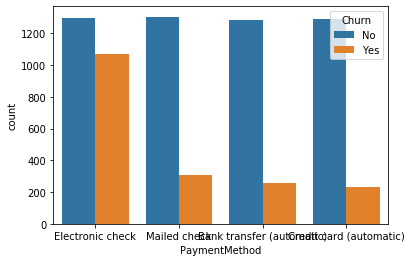

In [18]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)

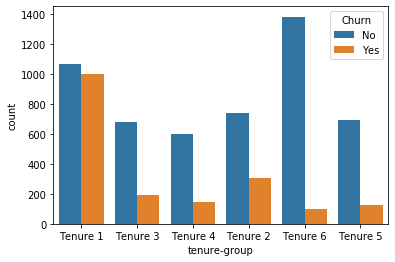

In [19]:
sns.countplot(x='tenure-group', hue='Churn', data=data)

In [20]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [21]:
data = data.drop("customerID" , axis = 1) # This doesn't really important for classification
data = data.drop("tenure-group" , axis = 1) #just for visulisation Purpose

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [23]:
two_cat_col = data.nunique()[data.nunique() == 2].keys().tolist() #for creating binary encoder using LabelEncoder
mul_cat_col = data.nunique()[data.nunique() < 6].keys().tolist() 
scale_col = [i for i in data.columns if i not in two_cat_col + mul_cat_col ] # the numeri
mul_cat_col = [i for i in mul_cat_col if i not in two_cat_col]


lb = LabelEncoder()
for i in two_cat_col:
    data[i] = lb.fit_transform(data[i])

data = pd.get_dummies(data = data , columns= mul_cat_col)

In [24]:
std = StandardScaler()
scaled_data = std.fit_transform(data[scale_col])
scaled_data = pd.DataFrame(data = scaled_data , columns= scale_col)
data = data.drop(scale_col , axis =1)
data = data.merge(scaled_data ,left_index=True,right_index=True , how = "left")

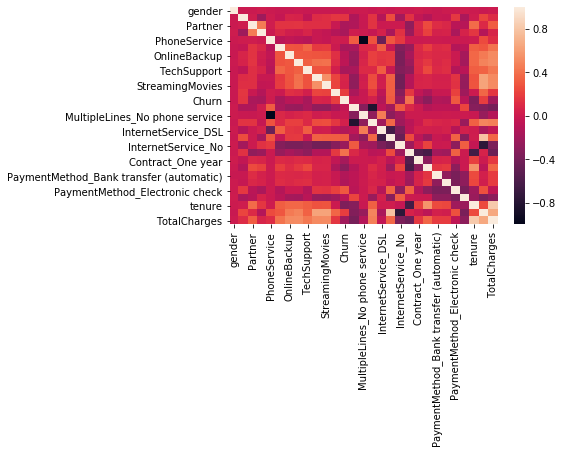

In [25]:
sns.heatmap(data.corr())

In [26]:
X = data.drop("Churn" , axis = 1)
Y = data["Churn"]

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 111)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def Ml_models(model_name,X,Y,test):
    model = model_name
    model.fit(X,Y)
    predicted = model.predict(test)
    return predicted

def report_gen(model,Ytest,Ypred):
    print(f'Report for {model}',end="\n")
    print(confusion_matrix(Ytest,Ypred))
    print(classification_report(Ytest,Ypred))

### Model Evaluation

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
Knn_prediction = Ml_models(KNeighborsClassifier(),X_train,Y_train,X_test)
report_gen(KNeighborsClassifier(),Y_test,Knn_prediction)
SVM_prediction = Ml_models(SVC(),X_train,Y_train,X_test)
report_gen(SVC(),Y_test,SVM_prediction)
logistic_prediction = Ml_models(LogisticRegression(),X_train,Y_train,X_test)
report_gen(LogisticRegression(),Y_test,logistic_prediction)
DT_prediction = Ml_models(DecisionTreeClassifier(random_state = 8),X_train,Y_train,X_test)
report_gen(DecisionTreeClassifier(),Y_test,DT_prediction)

Report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[[895 175]
 [156 183]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1070
           1       0.51      0.54      0.53       339

    accuracy                           0.77      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.77      0.77      0.77      1409



/home/shreya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
[[973  97]
 [176 163]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1070
           1       0.63      0.48      0.54       339

    accuracy                           0.81      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.81      0.80      1409

Report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
[[941 129]
 [139 200]]
              precision    recall  f1-

/home/shreya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.metrics import accuracy_score
def Score_gen(y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    return acc

In [36]:
d = {"KNN" : Knn_prediction,
     "SVM" : SVM_prediction,
    "Logistic_Regression" :logistic_prediction,
    "Decision_Tree" :DT_prediction}
for i in d:
    print(f'{i} Score : {Score_gen(Y_test,d[i])}')

KNN Score : 0.7650816181689141
SVM Score : 0.8062455642299503
Logistic_Regression Score : 0.8097941802696949
Decision_Tree Score : 0.7345635202271115


### Final Conclusions

####  SVM gives the accuracy of 80%